## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#finalMouseData = study_results.set_index('Mouse ID').join(mouse_metadata.set_index('Mouse ID'), lsuffix='_prime', rsuffix='_secondary')
finalMouseData = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='outer')

pd.set_option("display.max_rows", None, "display.max_columns", None)
# Display the data table for preview
print(finalMouseData)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
5        b128         25           43.262145                 1    Capomulin   
6        b128         30           40.605335                 1    Capomulin   
7        b128         35           37.967644                 1    Capomulin   
8        b128         40           38.379726                 2    Capomulin   
9        b128         45           38.982878                 2    Capomulin   
10       f932          0           45.000000                 0     Ketapril   
11       g107          0           45.000000        

In [3]:
# Checking the number of mice.
finaDataMouseCount = len(finalMouseData['Mouse ID'].unique())

finaDataMouseCount

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseIds = finalMouseData[['Mouse ID', 'Timepoint']]
#print(finalMouseData[mouseIds.isin(mouseIds[mouseIds.duplicated(keep=False)])])
duplicateIds = finalMouseData[mouseIds.isin(mouseIds[mouseIds.duplicated(keep=False)])]
#duplicateMice = finalMouseData.duplicated(['Mouse ID', 'Timepoint'])

#print(duplicateIds[['Mouse ID', 'Timepoint']].dropna())
duplicateIds = duplicateIds[['Mouse ID', 'Timepoint']].dropna()
duplicateJustIds = duplicateIds['Mouse ID'].unique()

#duplicateFreeData = finalMouseData.drop_duplicates(keep=False, subset=['Mouse ID', 'Timepoint'])
#print(duplicateFreeData)
#print(duplicateJustIds)
#duplicatesDroppedMiceData = finalMouseData[~finalMouseData['Mouse ID'].isin(duplicateJustIds)]
#duplicateMiceData = finalMouseData[finalMouseData['Mouse ID'].isin(duplicateJustIds)]
#print(duplicatesDroppedMiceData)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMiceData = finalMouseData[finalMouseData['Mouse ID'].isin(duplicateJustIds)]


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicatesDroppedMiceData = finalMouseData[~finalMouseData['Mouse ID'].isin(duplicateJustIds)]

In [7]:
# Checking the number of mice in the clean DataFrame.
cleanMouseCount = len(duplicatesDroppedMiceData['Mouse ID'].unique())

print(cleanMouseCount)

248


## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumorMean = duplicatesDroppedMiceData.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumorMedian = duplicatesDroppedMiceData.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumorVar = duplicatesDroppedMiceData.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumorStd = duplicatesDroppedMiceData.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumorSem = duplicatesDroppedMiceData.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

combineStatsFrame = pd.concat([tumorMean, tumorMedian, tumorVar, tumorStd, tumorSem], 
                             axis = 1)

combineStatsFrame.columns = ['Tumor Mean', 'Tumor Median', 'Tumor Variance', 'Tumor Std.', 'Tumor Sem.']
combineStatsFrame

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std.,Tumor Sem.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
oneLineSummary = duplicatesDroppedMiceData.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'], axis="columns")

oneLineSummary.columns = ['Tumor Mean', 'Tumor Median', 'Tumor Variance', 'Tumor Std.', 'Tumor Sem.']

oneLineSummary

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std.,Tumor Sem.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [45]:
miceCount = duplicatesDroppedMiceData.groupby('Drug Regimen')['Mouse ID'].nunique()

miceCount

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Number of Mice')

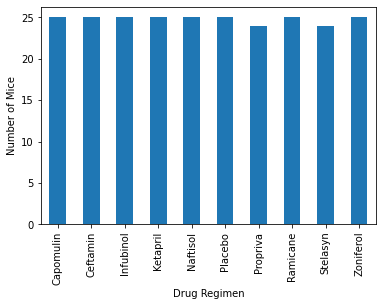

In [65]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
barMice = miceCount.plot.bar(x=miceCount.index, y=miceCount)

barMice.set_ylabel('Number of Mice')

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64


<BarContainer object of 10 artists>

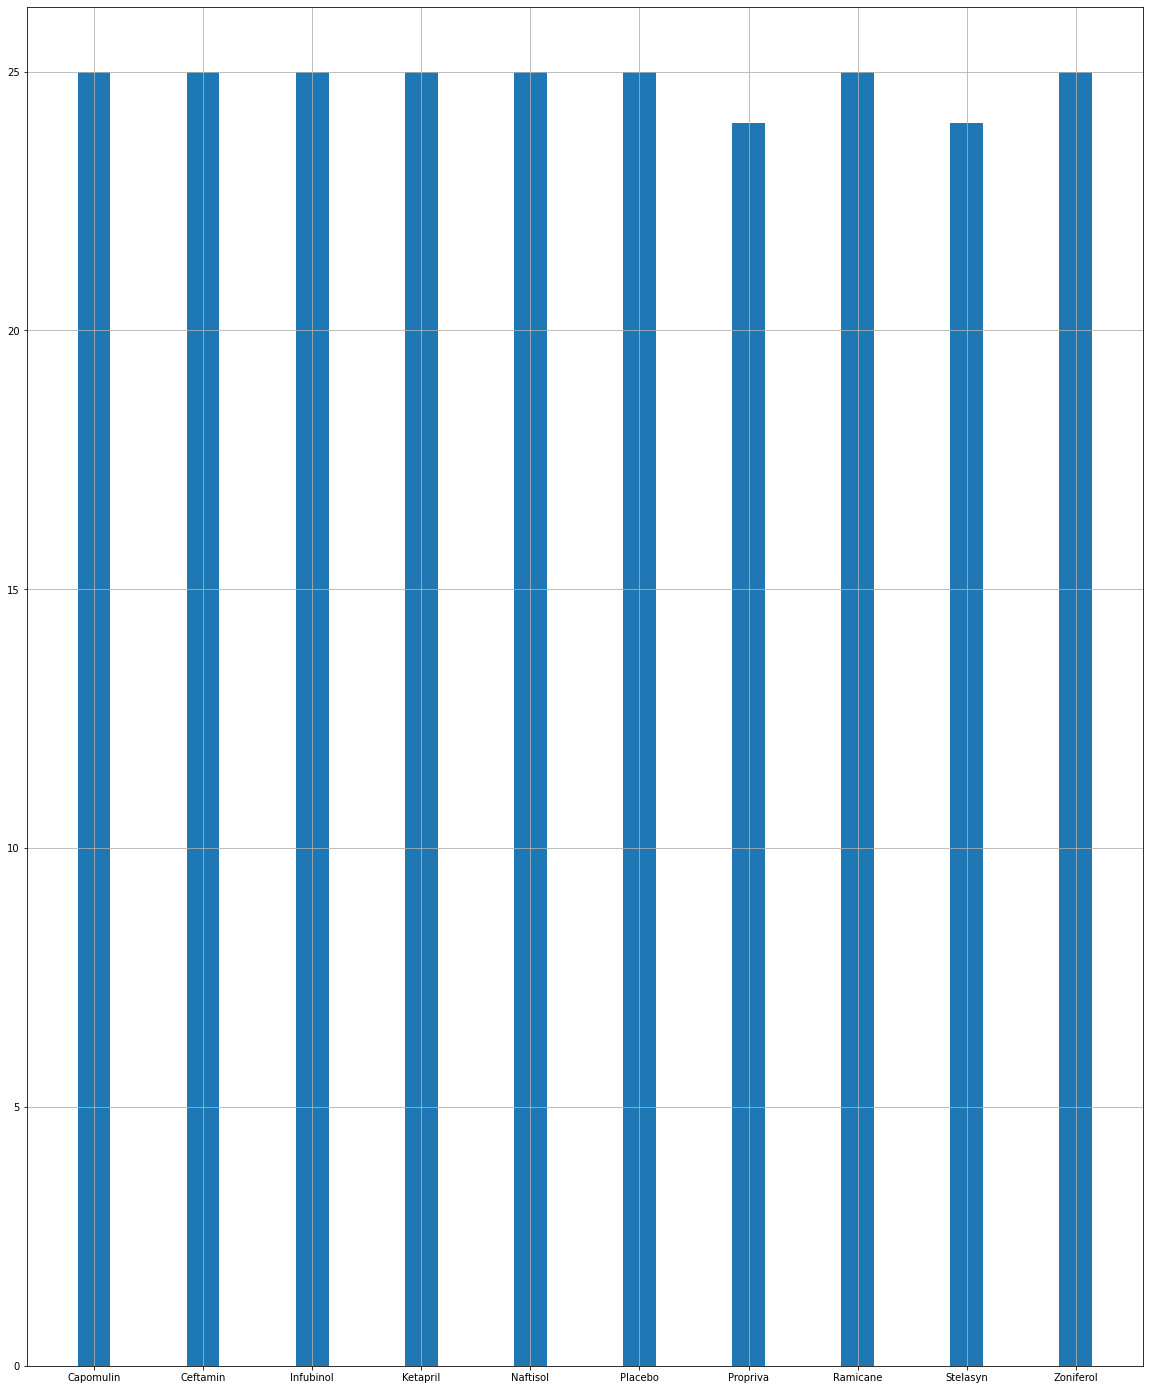

In [66]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.figure(figsize=(20, 25))
plt.grid(zorder=0)
plt.bar(miceCount.index, miceCount, width=0.3, align='center')

In [69]:
miceGender = duplicatesDroppedMiceData.groupby('Sex')['Mouse ID'].nunique()

miceGender

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

Text(0, 0.5, '')

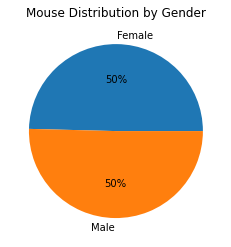

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

piePlot1 = miceGender.plot.pie(title='Mouse Distribution by Gender', autopct='%1.00f%%')
piePlot1.set_ylabel('')

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
